# Word Sentiment Tutorial

Based on the "How Good is Good?" data graphic. 
* Survey report:  https://today.yougov.com/society/articles/21717-how-good-good-1 
* U.S. Survey data:
  * https://d3nkl3psvxxpe9.cloudfront.net/documents/YouGov_US_word_sentiment_1.pdf
  * https://d3nkl3psvxxpe9.cloudfront.net/documents/YouGov_US_word_sentiment_2.pdf

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Sample of the data set
# dictionary key is the term
# List has 11 entries (percent of votes for 0 -- very negative, up to 10 -- very positive)
# Category of "Don't know" equals 100 - sum of list 

sentiment_dict = {
    "Excellent" : [1, 0, 0, 1, 2, 4, 3, 6, 14, 20, 45],
    "Good"      : [1, 0, 0, 1, 2, 13, 16, 24, 18, 9, 11],
    "Alright"   : [0, 1, 1, 3, 7, 29, 24, 15, 8, 4, 4],
    "Mediocre"  : [6, 4, 6, 9, 16, 37, 7, 3, 2, 1, 2],
    "Bad"       : [16, 13, 16, 18, 11, 10, 4, 3, 2, 1, 2],
    "Poor"      : [17, 13, 18, 17, 10, 11, 3, 3, 1, 2, 1]    
}


We can compute the average sentiment of each term by weighting each percent by its index value:

In [14]:
avg_dict = {}

for w in sentiment_dict:
    avg = sum([i * sentiment_dict[w][i] for i in range(11)]) / sum(sentiment_dict[w])
    avg_dict[w] = round(avg, 2)
    
print(avg_dict)

{'Excellent': 8.68, 'Good': 7.11, 'Alright': 5.98, 'Mediocre': 4.3, 'Bad': 2.95, 'Poor': 2.81}


We can get a very simple view of these how these averages compare by using a scatterplot:

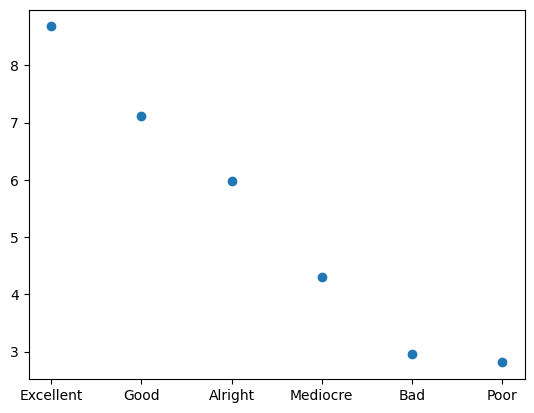

In [23]:
x_vals = range(len(sentiment_dict))
y_vals = avg_dict.values() 
labels = avg_dict.keys()

plt.scatter(x_vals, y_vals)
plt.xticks(x_vals, labels)
plt.show()


We could also rotate the graph to match the ridge plot we saw earlier:

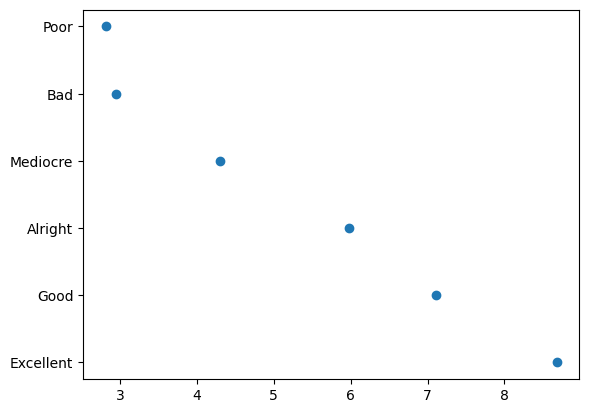

In [24]:
x_vals = avg_dict.values() 
y_vals = range(len(sentiment_dict))
x_labels = avg_dict.keys()

plt.scatter(x_vals, y_vals)
plt.yticks(y_vals, labels)
plt.show()

For an individual word, we can visualize its sentiment distribution by using histograms and density plots like we discussed last time: 

In [28]:
# Add counts of each number to dictionary 
expanded_sentiment = {}
for w in sentiment_dict:
    cur_vals = []
    for i in range(11):
        cur_vals += [i] * sentiment_dict[w][i]
    # Add in null values for the "don't know" category
    cur_vals += [None] * (100 - sum(sentiment_dict[w]))
    expanded_sentiment[w] = cur_vals

In [60]:
df = pd.DataFrame(expanded_sentiment)
df.head(10)

,Excellent,Good,Alright,Mediocre,Bad,Poor
0,0.0,0.0,1.0,0.0,0.0,0.0
1,3.0,3.0,2.0,0.0,0.0,0.0
2,4.0,4.0,3.0,0.0,0.0,0.0
3,4.0,4.0,3.0,0.0,0.0,0.0
4,5.0,5.0,3.0,0.0,0.0,0.0
5,5.0,5.0,4.0,0.0,0.0,0.0
6,5.0,5.0,4.0,1.0,0.0,0.0
7,5.0,5.0,4.0,1.0,0.0,0.0
8,6.0,5.0,4.0,1.0,0.0,0.0
9,6.0,5.0,4.0,1.0,0.0,0.0


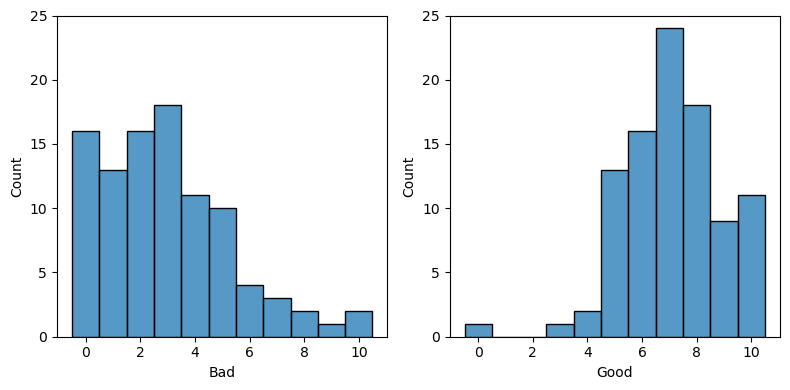

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(df['Bad'], bins = 11, discrete=True, ax = axs[0])
sns.histplot(df['Good'], bins = 11, discrete=True, ax = axs[1])

for ax in axs:
    ax.set_ylim(0, 25)

plt.tight_layout()
plt.show()

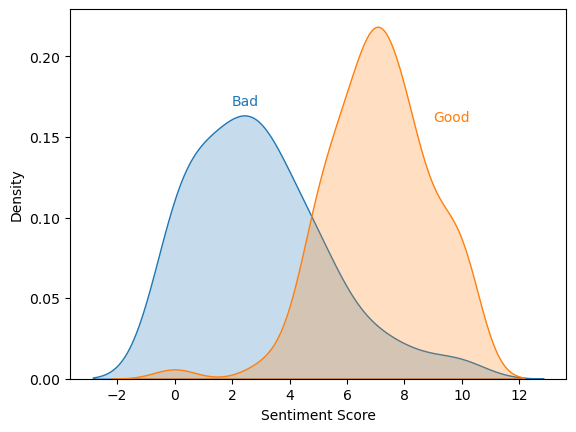

In [56]:
# Draw two density plots

fig, ax = plt.subplots()

sns.kdeplot(df['Bad'], fill=True, ax = ax)
sns.kdeplot(df['Good'], fill=True, ax = ax)

ax.text(2, 0.17, "Bad", color="tab:blue")
ax.text(9, 0.16, "Good", color="tab:orange")

ax.set_xlabel("Sentiment Score")

plt.show()

We can remove the "improbable" portions below 0 and above 10:

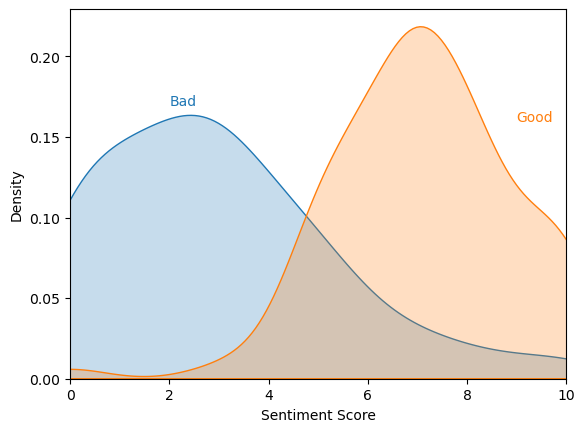

In [57]:
# Draw two density plots

fig, ax = plt.subplots()

sns.kdeplot(df['Bad'], fill=True, ax = ax)
sns.kdeplot(df['Good'], fill=True, ax = ax)

ax.text(2, 0.17, "Bad", color="tab:blue")
ax.text(9, 0.16, "Good", color="tab:orange")

ax.set_xlim(0, 10)
ax.set_xlabel("Sentiment Score")

plt.show()

We can also generate a ridge plot using densities from each of the input words:
* Another way to accomplish this can be adapted from here:  https://seaborn.pydata.org/examples/kde_ridgeplot

Text(5, 0.2, 'Density Plot with Multiple Words')

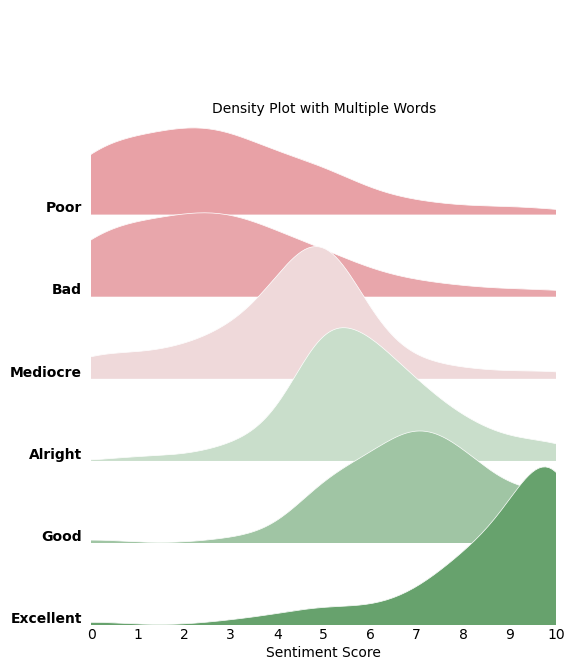

In [105]:
words = list(expanded_sentiment.keys())[::-1]
pal = sns.diverging_palette(10, 130, as_cmap=True) # Red-Green color spectrum (pass in values from 0 to 1)

fig, axs = plt.subplots(len(words), 1, figsize=(6, 8))

for i in range(len(words)):
    
    w = words[i]
    subset = df[w]
    
    # Draw the density plot
    sns.kdeplot(subset, linewidth = 0.1, fill = True, color=pal(avg_dict[w] / 10),
                 label = w, ax = axs[i], alpha = 1)
    sns.kdeplot(subset, linewidth = 0.5, color="white",
                 label = w, ax = axs[i])
    
    axs[i].text(-0.2, 0, w, fontweight="bold", ha="right", va="bottom")
    axs[i].set_ylim(0, 0.4)
    axs[i].set_xlim(0, 10)
    axs[i].set_axis_off()

# Condense plots
fig.subplots_adjust(hspace=-0.6)

# Add in units at bottom
xvals = list(range(0, 11))
for x in xvals:
    axs[-1].text(x, -0.025, str(x), ha = "center")
axs[-1].text(5, -0.06, "Sentiment Score", ha = "center")

# Figure title
axs[0].text(5, 0.2, 'Sentiment Survey', ha="center") 


### Add Error Bars to Scatter Plot

Viewing the distribution of each word is interesting, but maybe not necessary every time. Let's go back to the scatterplot, and add some error bars to give a different view of the uncertainty. 

First we'll start with the standard deviation:

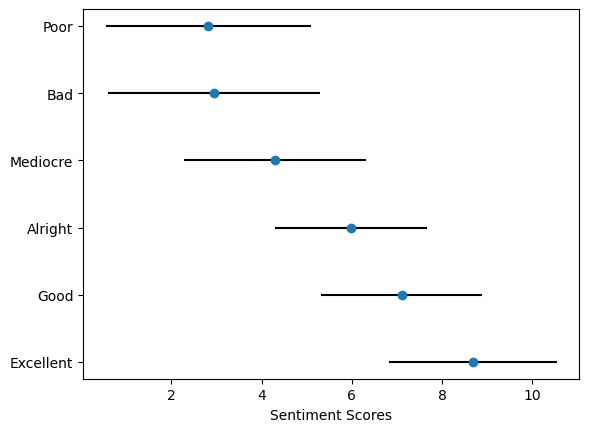

In [118]:
# Remove "None" from expanded dictionary
new_dict = {}
for w in expanded_sentiment:
    new_dict[w] = [x for x in expanded_sentiment[w] if not x == None]

x_vals = [np.mean(new_dict[w]) for w in new_dict]
y_vals = range(len(new_dict))
x_labels = new_dict.keys()

std_devs = [np.std(new_dict[w]) for w in new_dict]

fig, ax = plt.subplots()
ax.errorbar(x_vals, y_vals, xerr=std_devs, linestyle="", color="black", zorder=-1) # send to back
ax.scatter(x_vals, y_vals)

ax.set_yticks(y_vals, labels)
ax.set_xlabel("Sentiment Scores")

plt.show()

We can add more statistical information by using box and whisker plots for each word:

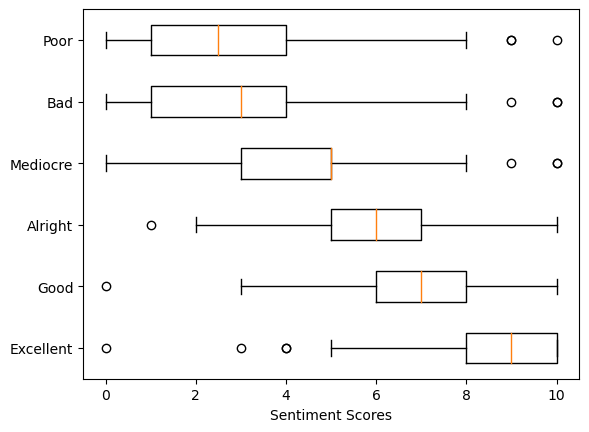

In [244]:
labels = list(new_dict.keys())
data = list(new_dict.values())
y_vals = range(1, len(new_dict) + 1)


fig, ax = plt.subplots()
ax.boxplot(x=data, vert=False)

ax.set_yticks(y_vals, labels)
ax.set_xlabel("Sentiment Scores")

plt.show()

We can also plot various confidence intervals around each mean, assuming the survey answers are normally distributed:

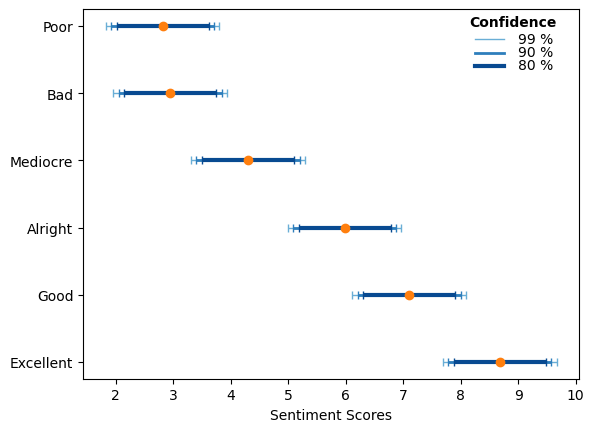

In [201]:
import scipy.stats as st 

blues = sns.color_palette(palette="Blues", as_cmap = True)

x_vals = [np.mean(new_dict[w]) for w in new_dict]
confidences = [0.99, 0.90, 0.80]
confidence_vals = []
for c in confidences:
    cur_list = []
    for w in new_dict:    
        cur_list.append(st.norm.interval(c, loc=np.mean(new_dict[w]), scale=st.sem(new_dict[w])))
    confidence_vals.append(cur_list)
# print(confidence_vals)
        
y_vals = range(len(new_dict))
x_labels = new_dict.keys()

std_devs = [np.std(new_dict[w]) for w in new_dict]

fig, ax = plt.subplots()
ax.errorbar(x_vals, y_vals, xerr=confidences[0], linestyle="", elinewidth=1, capsize=3, color=blues(0.5), zorder=-3) # send to back
ax.errorbar(x_vals, y_vals, xerr=confidences[1], linestyle="", elinewidth=2, capsize=3, color=blues(0.7), zorder=-2) # send to back
ax.errorbar(x_vals, y_vals, xerr=confidences[2], linestyle="", elinewidth=3, capsize=3, color=blues(0.9), zorder=-1) # send to back

ax.scatter(x_vals, y_vals, color="tab:orange")

# Create legend
ax.text(8.15, 5, "Confidence", fontweight="bold")
ax.plot([8.25, 8.75], [4.8] * 2, linewidth=1, color=blues(0.5))
ax.plot([8.25, 8.75], [4.6] * 2, linewidth=2, color=blues(0.7))
ax.plot([8.25, 8.75], [4.4] * 2, linewidth=3, color=blues(0.9))
ax.text(9, 4.75, "99 %")
ax.text(9, 4.55, "90 %")
ax.text(9, 4.35, "80 %")

ax.set_yticks(y_vals, labels)
ax.set_xlabel("Sentiment Scores")

plt.show()

Now we will do the same thing, but using a gradient band instead of error bars. 
* We will use the 99% confidence level as the boundaries

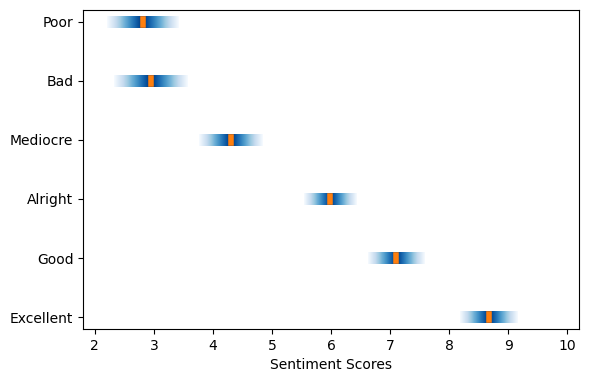

In [209]:
import scipy.stats as st 

blues = sns.color_palette(palette="Blues", as_cmap = True)

x_vals = [np.mean(new_dict[w]) for w in new_dict]

confidence_vals = []
for w in new_dict:    
    confidence_vals.append(st.norm.interval(0.99, loc=np.mean(new_dict[w]), scale=st.sem(new_dict[w])))
        
y_vals = range(len(new_dict))
x_labels = new_dict.keys()

fig, ax = plt.subplots()

# ax.scatter(x_vals, y_vals, marker="s", color="tab:orange")
for i in range(len(confidence_vals)): 
    # Plot "rectangles" for mean values 
    ax.plot([x_vals[i], x_vals[i]], [i-0.05, i + 0.05], linewidth=4, color="tab:orange")
    
    cur_val = confidence_vals[i]
    ax.imshow(np.linspace(0, 1, 256).reshape(1, -1), cmap=blues, extent=[cur_val[0], x_vals[i], i - 0.1, i + 0.1])
    ax.imshow(np.linspace(0, 1, 256).reshape(1, -1), cmap=blues.reversed(), extent=[x_vals[i], cur_val[1], i - 0.1, i + 0.1])

    
ax.set_xlim(1.8, 10.2)
ax.set_ylim(-0.2, 5.2)
ax.set_yticks(y_vals, labels)
ax.set_xlabel("Sentiment Scores")

plt.show()

If desired we can combine mean values and confidence intervals with the ridgeline plot from earlier:
* We will plot the mean values and the 95 % confidence interval

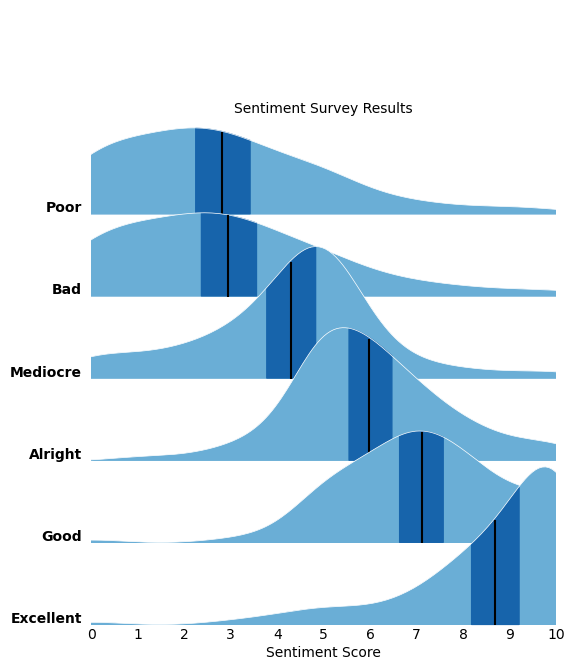

In [233]:
words = list(expanded_sentiment.keys())[::-1]
pal = sns.color_palette(palette="Blues", as_cmap = True)

mean_vals = [np.mean(new_dict[w]) for w in new_dict][::-1]
confidence_vals = []
for w in new_dict:    
    confidence_vals.append(st.norm.interval(0.99, loc=np.mean(new_dict[w]), scale=st.sem(new_dict[w])))
confidence_vals.reverse()

fig, axs = plt.subplots(len(words), 1, figsize=(6, 8))

for i in range(len(words)):
    
    w = words[i]
    subset = df[w]
    
    # Draw the density plot
    sns.kdeplot(subset, linewidth = 0.1, fill = True, color=pal(0.5),
                 label = w, ax = axs[i], alpha = 1)
    sns.kdeplot(subset, linewidth = 0.5, color="white",
                 label = w, ax = axs[i])
    
    # Extract density curve values
    line = axs[i].lines[-1]
    x, y = line.get_data()
    
    # Find where the mean is
    array = np.asarray(x)
    idx = (np.abs(x - mean_vals[i])).argmin()
    top = y[idx] * 2.45 # fudge factor for fudge lovers
    
    # Show the mean line
    axs[i].axvline(x=mean_vals[i], ymin=0, ymax=top, color="black")
    
    # Color the 95 % confidence interval 
    idx1 = (np.abs(x - confidence_vals[i][0])).argmin()
    idx2 = (np.abs(x - confidence_vals[i][1])).argmin()
    axs[i].fill_between(x[idx1:idx2+1], y1=y[idx1:idx2+1], y2=[0.0025] * (idx2 - idx1 + 1) , color=pal(0.8))
    
    axs[i].text(-0.2, 0, w, fontweight="bold", ha="right", va="bottom")
    axs[i].set_ylim(0, 0.4)
    axs[i].set_xlim(0, 10)
    axs[i].set_axis_off()

# Condense plots
fig.subplots_adjust(hspace=-0.6)

# Add in units at bottom
xvals = list(range(0, 11))
for x in xvals:
    axs[-1].text(x, -0.025, str(x), ha = "center")
axs[-1].text(5, -0.06, "Sentiment Score", ha = "center")

# Figure title
axs[0].text(5, 0.2, 'Sentiment Survey Results', ha="center") 

plt.show()